<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A1: Classification Model Development</h2>
Brenda Gutierrez
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

The Apprentice Chef is a meal kit delivery company that strives to maximize cross sell success. To achieve this objective, it is essential to have a thorough understanding of customer behavior and characteristics that drive cross sell revenue. Developing a classification model that can predict the success based on these factors is a vital step towards this goal.

Predictive models provide significant advantages over traditional marketing strategies as they enable businesses to target customers who are more likely to purchase additional products, thereby increasing revenue while reducing marketing costs. With accurate predictions of cross sell success, The Apprentice Chef can tailor its marketing efforts and create personalized offers that are more likely to appeal to specific customers.

To develop the classification model, I utilized data from The Apprentice Chef's customer database, which includes order history and customer engagement metrics. To ensure that the model was reliable and efficient, I preprocessed the data by performing feature engineering to extract meaningful information. I then split the data into training and testing sets and used various classification algorithms to develop and evaluate the model's performance.

The developed model provides insights into the most significant factors that impact cross sell success, enabling The Apprentice Chef to identify and target customers who are more likely to purchase additional products. This approach is a win-win for both the customer and the company, as customers receive relevant and personalized offers, while the company increases cross sell revenue and reduces marketing costs.

In [1]:
# importing libraries
import pandas            as pd                       # importing data science essentials
import numpy as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifier

# loading data
crsell = pd.read_excel('./__datasets/Cross_Sell_Success_Dataset_2023.xlsx')

In [2]:
# code to see correlation to y_variable

# y-variable is CROSS_SELL_SUCCESS

df_corr = crsell.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

In [3]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

According to the correlation matrix presented above, the variables that are most positively correlated with CROSS_SELL_SUCCESS are CANCELLATIONS_AFTER_NOON, MOBILE_LOGINS, and UNIQUE_MEALS_PURCH, with correlation coefficients of 0.14, 0.06, and 0.04, respectively. This suggests that customers who have a higher number of cancellations after noon, more mobile logins, and more unique meals purchased are more likely to make additional purchases.

On the other hand, variables such as AVG_MEAN_RATING and WEEKLY_PLAN are negatively correlated with CROSS_SELL_SUCCESS, with correlation coefficients of -0.04 and -0.01, respectively. This suggests that customers who give lower ratings and have a weekly plan are less likely to make additional purchases.

However, as we prepare the variables and run some tests, I was able to see that those don't necessarily are helpful to make an accurate prediction.

On the cell on the left, I defined a function that creates a visualization of a confusion matrix, in order to evaluate the performance of each of the classification models developed. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives of the model's predictions, compared to the actual values of the target variable.

After analyzing the first correlation, I tested the x - variables in order to see its performance on the different models selected. After observing the results I decided to create new variables (features) that I considered could improve their performance and after different trials, I decide to feature engineer the EMAIL variable. In this case, I selected a list of email domains that I consider are commonly associated with spam emails. I then created a for loop that iterates through each email in the "EMAIL" column of the dataset. If the domain of the email matches one of the spam email domains in our list, I assigned a value of 1 to a new variable called "SPAM" for that observation. If the domain does not match, I assigned a value of 0.

Next, I created two more new variables. The first one is called "WHOLE_MEALS", which is the ratio of unique meals purchased to the total number of meals ordered. The second one is called "total_MEALS", which is a binary variable that takes a value of 1 if the total number of meals ordered is greater than 300, and 0 otherwise.

By creating these new features, I hoped to provide the models with more information that may help them better predict the target variable.

At the end I printed the DataFrame with the new features in order to see the distribution of the data. 

In [4]:
# testing all variables

## x_var = ['CANCELLATIONS_AFTER_NOON', 
#           'MOBILE_LOGINS', 
#           'UNIQUE_MEALS_PURCH', 
#           'PC_LOGINS',
#           'AVG_TIME_PER_SITE_VISIT',
#           'LATE_DELIVERIES ',
#           'LARGEST_ORDER_SIZE',
#           'TOTAL_MEALS_ORDERED',
#           'AVG_PREP_VID_TIME',
#           'TOTAL_PHOTOS_VIEWED',
#           'REVENUE',
#           'CONTACTS_W_CUSTOMER_SERVICE',
#           'PRODUCT_CATEGORIES_VIEWED',
#           'WEEKLY_PLAN',
#           'AVG_MEAN_RATING',
#           'SPAM',
#           'NEW_UNIQUE']

# feature engineering new variables in order to test
#crsell['total_orders'] = crsell['TOTAL_MEALS_ORDERED'] + crsell['UNIQUE_MEALS_PURCH']
#crsell['total_visits'] = crsell['PRODUCT_CATEGORIES_VIEWED'] * crsell['AVG_TIME_PER_SITE_VISIT']

# # create dummy variables for categorical features
# crsell = pd.get_dummies(crsell, columns=['CONTACTS_W_CUSTOMER_SERVICE'], drop_first=True)
# crsell = pd.get_dummies(crsell, columns=['LARGEST_ORDER_SIZE'], drop_first=True)

# drop irrelevant or redundant features
# crsell = crsell.drop(['PC_LOGINS', 'MOBILE_LOGINS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
#                       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'WEEKLY_PLAN'], axis=1)

#selecting only spam emails to consider into x - variables
spam_emails = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

#creating for loop to call only the domains established above
for i in range(len(crsell)):
    email = crsell.loc[i, 'EMAIL']
    if email.split('@')[-1] in spam_emails:
        crsell.loc[i, 'SPAM'] = 1
    else:
        crsell.loc[i, 'SPAM'] = 0

# save the updated data
crsell = pd.DataFrame(crsell)

# Creating new features in order to improve score
crsell['WHOLE_MEALS'] = crsell['UNIQUE_MEALS_PURCH'] / crsell['TOTAL_MEALS_ORDERED']
crsell['total_MEALS'] = crsell['TOTAL_MEALS_ORDERED'].apply(lambda x: 1 if x > 300 else 0)

#visualizing the new Data Frame
crsell.describe().round(2)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,SPAM,WHOLE_MEALS,total_MEALS
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15,0.2,0.18,0.01
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15,0.4,0.24,0.08
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00,0.0,0.01,0.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00,0.0,0.07,0.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00,0.0,0.10,0.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00,0.0,0.15,0.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00,1.0,1.00,1.00


Afterwards I decided to see the correlation of the new features and decided to use the ones with the most negative correlation because after running some tests, I saw that the value of the features with negative correlation increase the likelihood of a positive outcome for the target variable. Therefore, selecting features with strong negative correlation could potentially improve the performance of a classification model. 

In [5]:
# code to see correlation to y_variable

df_corr = crsell.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
WHOLE_MEALS                   -0.01
total_MEALS                   -0.01
AVG_MEAN_RATING               -0.04
SPAM                          -0.28
Name: CROSS_SELL_SUCCESS, dtype: float64

I selected the features defined under x_var as well as the ones I featured engineered and then split the data into training and testing sets (x_train, x_test, y_train, y_test) for the models to be trained and tested on. 

These are the features I believe may be relevant to cross-selling success, such as how often customers have contacted our customer service team, the average time they spend on our website, and their average ratings of our products. I also included the new variable SPAM, which measures the number of times a customer has marked our emails as spam. I believe this may be an important factor because if customers are annoyed by the company's emails, they may be less likely to purchase additional products from us.

We then split our dataset into a training set and a test set, and use machine learning models to predict whether or not a customer will make an additional purchase. By testing the models on the test set, we can see how well they perform and select the best one.

The 'stratify' argument ensures that the classes in the target variable, 'CROSS_SELL_SUCCESS', are balanced in both the training and testing sets. This means that the proportion of successful and unsuccessful cross-selling outcomes is the same in both sets.

In [6]:
# creating list of x variables for the classification models to use

x_var = ['CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 
         'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'SPAM', 
         'WHOLE_MEALS', 'total_MEALS'] 
         
# testing features engineered above: 'total_orders', 'total_visits', 'SPAM'

# train/test split for models
x_data =  crsell.loc[ : , x_var]
y_data =  crsell.loc[ : , 'CROSS_SELL_SUCCESS']

x_train, x_test, y_train, y_test = train_test_split(
             x_data,
             y_data,
             random_state = 219,
             test_size    = 0.25,
             stratify     = y_data)

### MODEL DEVELOPMENT

LOGISTIC REGRESSION

Logistic Regression Model 

Training Accuracy: 0.7128
Testing  Accuracy: 0.7084
Train-Test Gap : 0.0044
AUC Score : 0.6143
Final Model Points: 0.7143


Confusion Matrix 

True Negatives : 55
False Positives: 101
False Negatives: 41
True Positives : 290



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


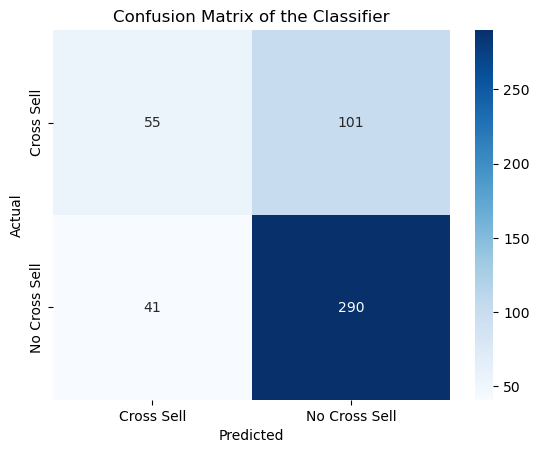

In [7]:

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# defining functions to make calculations and print later
logreg_training = (logreg_fit.score(x_train, y_train).round(4)) # accuracy
logreg_test     = (logreg_fit.score(x_test, y_test).round(4)) # accuracy
logreg_gap      = (logreg_training - logreg_test).round(4)
logreg_auc      = (roc_auc_score(y_true = y_test,
                                   y_score = logreg_pred).round(4))
final_model_points = (logreg_auc + .1).round(4)

#printing results
print(f"""Logistic Regression Model 

Training Accuracy: {logreg_training}
Testing  Accuracy: {logreg_test}
Train-Test Gap : {logreg_gap}
AUC Score : {logreg_auc}
Final Model Points: {final_model_points}""")

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""

Confusion Matrix 

True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

# calling the visual_cm function in order to visualize matrix
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

Out of the total 487 observations, the model predicted 55 as true negatives, 101 as false positives, 41 as false negatives, and 290 as true positives. This indicates that the model correctly predicted 345 of the observations and incorrectly predicted 142. The true positive rate, or sensitivity, of the model is 87.65% (290 out of 331 actual positives), while the true negative rate, or specificity, is 35.14% (55 out of 156 actual negatives). The false positive rate is 64.86%, which means that the model incorrectly predicted cross-sell success in a high number of cases where it did not actually occur.

DECISION TREE CLASSIFIER

In [8]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d


BEST MODEL:
Pruned Decision Tree Model 

Training Accuracy: 0.7169
Testing  Accuracy: 0.7187
Train-Test Gap : -0.0018
AUC Score : 0.6321
Final Model Points: 0.7321

True Negatives : 61
False Positives: 95
False Negatives: 42
True Positives : 289



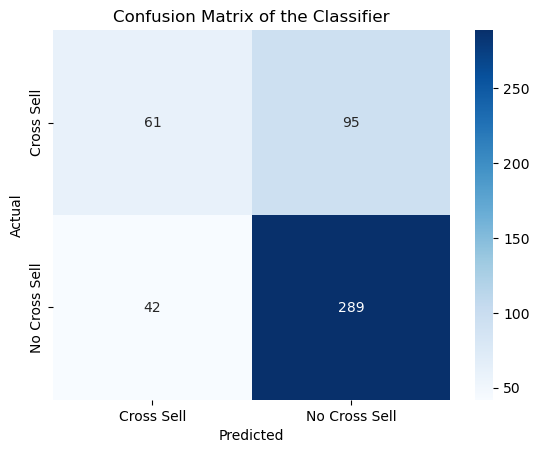

In [9]:
# INSTANTIATING a Decision Tree Classifier
tune = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'splitter': 'random'}

tree_pruned = DecisionTreeClassifier(criterion        = tune['criterion'],
                                     max_depth        = tune['max_depth'],
                                     min_samples_leaf = tune['min_samples_leaf'],
                                     random_state     = 219, 
                                     splitter         = tune['splitter'])

# tree_pruned = DecisionTreeClassifier(max_depth        = 4,
#                                      min_samples_leaf = 25,
#                                      random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)

# defining functions to make calculations and print later
tree_pruned_training = (tree_pruned_fit.score(x_train, y_train).round(4))
tree_pruned_test     = (tree_pruned_fit.score(x_test, y_test).round(4))
tree_pruned_gap      = (tree_pruned_training - tree_pruned_test).round(4)
tree_pruned_auc      = (roc_auc_score(y_true = y_test,
                                   y_score = tree_pruned_pred).round(4))
final_model_points = (tree_pruned_auc + .1)

#printing results
print(f"""
BEST MODEL:
Pruned Decision Tree Model 

Training Accuracy: {tree_pruned_training}
Testing  Accuracy: {tree_pruned_test}
Train-Test Gap : {tree_pruned_gap}
AUC Score : {tree_pruned_auc}
Final Model Points: {final_model_points}""")

# unpacking the confusion matrix
tree_pruned_tn, \
tree_pruned_fp, \
tree_pruned_fn, \
tree_pruned_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tree_pruned_tn}
False Positives: {tree_pruned_fp}
False Negatives: {tree_pruned_fn}
True Positives : {tree_pruned_tp}
""")

# calling the visual_cm function in order to visualize matrix
visual_cm(true_y = y_test,
          pred_y = tree_pruned_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

This confusion matrix shows that out of the total 487 predictions made by the model, 350 were correct and 137 were incorrect. Specifically, the model correctly predicted 61 customers who did not buy the promotion (True Negatives) and 289 customers who did buy the promotion (True Positives). However, it incorrectly predicted 95 customers would buy the promotion when they did not (False Positives), and 42 customers would not buy the promotion when they did (False Negatives).

RANDOM FOREST 

Random Forest Model 

Training Accuracy: 1.0
Testing  Accuracy: 0.6797
Train-Test Gap : 0.3203
AUC Score : 0.5779
Final Model Points: 0.6779

True Negatives : 46
False Positives: 110
False Negatives: 46
True Positives : 285



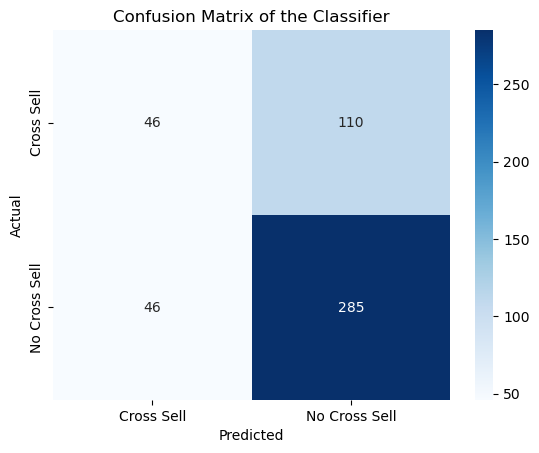

In [10]:
# INSTANTIATING a classification tree object
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_depth = None,
                                       min_samples_split = 2,
                                       max_features = "auto")


# FITTING the training data
random_forest_fit = random_forest.fit(x_train, y_train)


# PREDICTING on new data
random_forest_pred = random_forest_fit.predict(x_test)

# defining functions to make calculations and print later
random_forest_training = (random_forest_fit.score(x_train, y_train).round(4))
random_forest_test     = (random_forest_fit.score(x_test, y_test).round(4))
random_forest_gap      = (random_forest_training - random_forest_test).round(4)
random_forest_auc      = (roc_auc_score(y_true = y_test,
                                   y_score = random_forest_pred).round(4))
final_model_points = (random_forest_auc + .1).round(4)

#printing results
print(f"""Random Forest Model 

Training Accuracy: {random_forest_training}
Testing  Accuracy: {random_forest_test}
Train-Test Gap : {random_forest_gap}
AUC Score : {random_forest_auc}
Final Model Points: {final_model_points}""")

# unpacking the confusion matrix
random_forest_tn, \
random_forest_fp, \
random_forest_fn, \
random_forest_tp = confusion_matrix(y_true = y_test, y_pred = random_forest_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {random_forest_tn}
False Positives: {random_forest_fp}
False Negatives: {random_forest_fn}
True Positives : {random_forest_tp}
""")

# calling the visual_cm function in order to visualize matrix
visual_cm(true_y = y_test,
          pred_y = random_forest_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

FINAL RESULTS

In [11]:
# comparing results
print(f"""
Model                                  AUC Score               TN, FP, FN, TP
-----                                  ---------               --------------
Logistic Regression                    {logreg_auc}                 {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
BEST MODEL: Pruned Decision Tree       {tree_pruned_auc}              {tree_pruned_tn, tree_pruned_fp, tree_pruned_fn, tree_pruned_tp}
Random Forest                          {random_forest_auc}              {random_forest_tn, random_forest_fp, random_forest_fn, random_forest_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic Regression', 'Pruned Decision Tree', 'Random Forest'],
           
    'AUC Score' : [logreg_auc, tree_pruned_auc, random_forest_auc],
    
    'Training Accuracy' : [logreg_training,
                           tree_pruned_training,
                           random_forest_training],
           
    'Testing Accuracy'  : [logreg_test,
                           tree_pruned_test,
                           random_forest_test],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (tree_pruned_tn, tree_pruned_fp, tree_pruned_fn, tree_pruned_tp),
                           (random_forest_tn, random_forest_fp, random_forest_fn, random_forest_tp)]}



Model                                  AUC Score               TN, FP, FN, TP
-----                                  ---------               --------------
Logistic Regression                    0.6143                 (55, 101, 41, 290)
BEST MODEL: Pruned Decision Tree       0.6321              (61, 95, 42, 289)
Random Forest                          0.5779              (46, 110, 46, 285)

